In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [60]:
import img_functions as imf
import classify
import procedures as proc
import db_man
import sqlite3

In [176]:
dbpath = '/home/deshthedesher/Documents/curdb.db'
dbm = db_man.DBMan(dbpath, load_labelling=True)
from models import labelledcontour
sns.set_style('ticks')

In [91]:
reload(labelledcontour)
cnx = sqlite3.connect(dbpath)
LabMan = labelledcontour.LabelledContourManager(cnx)
labels, features = LabMan.split_labels()
unique_labels = classify.ml_helpers.number_unique_strings(labels[0])

In [92]:
alldata = LabMan.load_all_labels()

In [148]:
reload(classify.ml_helpers)
X = classify.ml_helpers.whiten_matrix(features)
X

z_binsize   z_threshold  contour_length  centerheight    x_variance  \
0   6.681119e+16 -3.580507e+15    1.251844e+15  2.104343e+15  1.672530e+14   
1   1.080324e+19 -5.789610e+17    2.024208e+17  3.402682e+17  2.704449e+16   
2   1.049836e+17 -5.626222e+15    1.967083e+15  3.306656e+15  2.628127e+14   
3   6.681119e+16 -3.580507e+15    1.251844e+15  2.104343e+15  1.672530e+14   
4   7.270617e+16 -3.896427e+15    1.362299e+15  2.290017e+15  1.820103e+14   
5   1.080324e+19 -5.789610e+17    2.024208e+17  3.402682e+17  2.704449e+16   
6   3.633221e+17 -1.947095e+16    6.807583e+15  1.144351e+16  9.095292e+14   
7   3.634833e+17 -1.947959e+16    6.810603e+15  1.144859e+16  9.099326e+14   
8   6.920467e+16 -3.708777e+15    1.296691e+15  2.179731e+15  1.732448e+14   
9   1.222994e+16 -6.554202e+14    2.291530e+14  3.852050e+14  3.061607e+13   
10  3.634833e+17 -1.947959e+16    6.810603e+15  1.144859e+16  9.099326e+14   
11  1.126398e+17 -6.036526e+15    2.110536e+15  3.547800e+15  2.819789e+14   
12  2.226537e+16 -1.193233e+15    4.171872e+14  7.012894e+14  5.573843e+13   
13  1.532839e+17 -8.214705e+15    2.872088e+15  4.827965e+15  3.837262e+14   
14  4.797851e+19 -2.571237e+18    8.989755e+17  1.511173e+18  1.201079e+17   
15  2.226537e+16 -1.193233e+15    4.171872e+14  7.012894e+14  5.573843e+13   
16  1.532839e+17 -8.214705e+15    2.872088e+15  4.827965e+15  3.837262e+14   
17  4.797851e+19 -2.571237e+18    8.989755e+17  1.511173e+18  1.201079e+17   
18  3.807540e+19 -2.040515e+18    7.134205e+17  1.199256e+18  9.531676e+16   
19  7.676754e+18 -4.114082e+17    1.438397e+17  2.417938e+17  1.921775e+16   
20  5.979481e+16 -3.204489e+15    1.120378e+15  1.883349e+15  1.496885e+14   
21  1.222994e+16 -6.554202e+14    2.291530e+14  3.852050e+14  3.061607e+13   
22  6.681119e+16 -3.580507e+15    1.251844e+15  2.104343e+15  1.672530e+14   
23  3.633221e+17 -1.947095e+16    6.807583e+15  1.144351e+16  9.095292e+14   
24  1.049836e+17 -5.626222e+15    1.967083e+15  3.306656e+15  2.628127e+14   
25  6.681119e+16 -3.580507e+15    1.251844e+15  2.104343e+15  1.672530e+14   
26  1.222994e+16 -6.554202e+14    2.291530e+14  3.852050e+14  3.061607e+13   
27  1.912494e+17 -1.024933e+16    3.583449e+15  6.023758e+15  4.787677e+14   
28  1.532839e+17 -8.214705e+15    2.872088e+15  4.827965e+15  3.837262e+14   
29  4.797851e+19 -2.571237e+18    8.989755e+17  1.511173e+18  1.201079e+17   
30  3.675279e+16 -1.969635e+15    6.886387e+14  1.157598e+15  9.200579e+13   
31  7.676754e+18 -4.114082e+17    1.438397e+17  2.417938e+17  1.921775e+16   
32  1.049836e+17 -5.626222e+15    1.967083e+15  3.306656e+15  2.628127e+14   
33  1.126398e+17 -6.036526e+15    2.110536e+15  3.547800e+15  2.819789e+14   
34  4.590617e+16 -2.460178e+15    8.601461e+14  1.445901e+15  1.149201e+14   
35  5.784459e+16 -3.099974e+15    1.083837e+15  1.821924e+15  1.448063e+14   
36  1.126398e+17 -6.036526e+15    2.110536e+15  3.547800e+15  2.819789e+14   
37  1.222994e+16 -6.554202e+14    2.291530e+14  3.852050e+14  3.061607e+13   
38  2.215869e+18 -1.187516e+17    4.151884e+16  6.979295e+16  5.547138e+15   

      y_variance   circle_err2    circle_rad  contour_height  \
0   2.310853e+14  1.134528e+14 -1.062966e+15    5.081159e+14   
1   3.736604e+16  1.834509e+16 -1.718795e+17    8.216134e+16   
2   3.631154e+14  1.782738e+14 -1.670289e+15    7.984268e+14   
3   2.310853e+14  1.134528e+14 -1.062966e+15    5.081159e+14   
4   2.514747e+14  1.234631e+14 -1.156755e+15    5.529486e+14   
5   3.736604e+16  1.834509e+16 -1.718795e+17    8.216134e+16   
6   1.256651e+15  6.169609e+14 -5.780451e+15    2.763155e+15   
7   1.257208e+15  6.172345e+14 -5.783015e+15    2.764381e+15   
8   2.393639e+14  1.175172e+14 -1.101046e+15    5.263189e+14   
9   4.230077e+13  2.076781e+13 -1.945785e+14    9.301188e+13   
10  1.257208e+15  6.172345e+14 -5.783015e+15    2.764381e+15   
11  3.895964e+14  1.912748e+14 -1.792098e+15    8.566537e+14   
12  7.701111e+13  3.780907e+13 -3.542420e+14    1.6933

In [131]:
reload(classify.ml_helpers)
components, vectors, values = classify.ml_helpers.PCA(features)

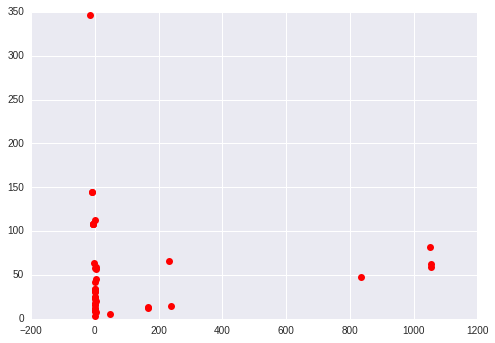

In [132]:
plt.plot(components[0], components[1], 'ro')
plt.show()

In [150]:
from sklearn import datasets


In [151]:
components, vectors, values = classify.ml_helpers.PCA(X)

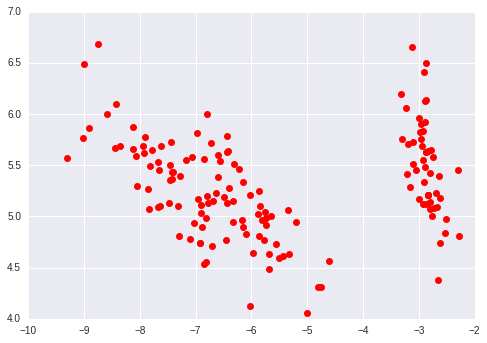

In [152]:
plt.plot(components[0], components[1], 'ro')
plt.show()

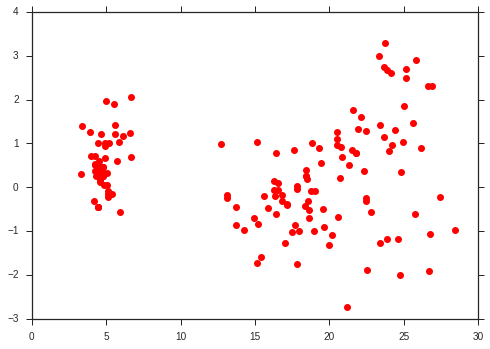

In [177]:
reload(classify.ml_helpers)
iris = datasets.load_iris()
X, Y = iris['data'], iris['target']
whitened = classify.ml_helpers.whiten_matrix(X)
components, vectors, values = classify.ml_helpers.PCA(whitened)
plt.plot(components[0], components[1], 'ro')
plt.show()

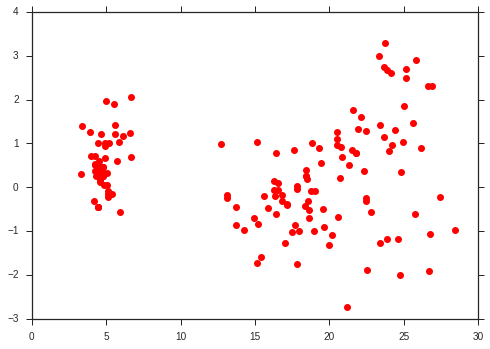

In [178]:
reload(classify.ml_helpers)
iris = datasets.load_iris()
X, Y = iris['data'], iris['target']
whitened = classify.ml_helpers.whiten_matrix(X)
components, vectors, values = classify.ml_helpers.PCA(whitened)
plt.plot(components[0], components[1], 'ro')
plt.show()

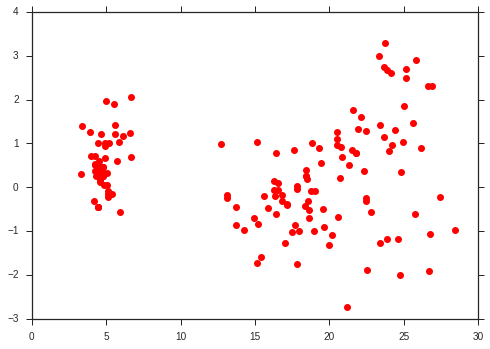

In [179]:
components, vectors, values = classify.ml_helpers.PCA(whitened)
plt.plot(components[0], components[1], 'ro')
plt.show()

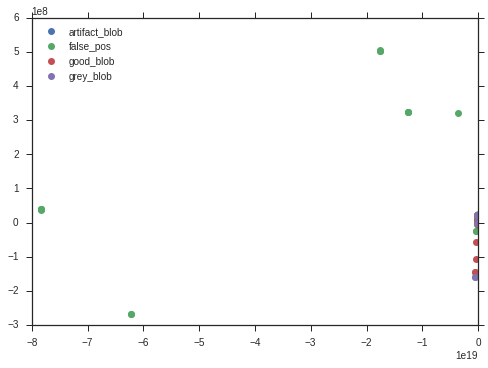

In [217]:
reload(classify.ml_helpers)

cnx = sqlite3.connect(dbpath)
LabMan = labelledcontour.LabelledContourManager(cnx)
labels, features = LabMan.split_labels()
unique_labels = classify.ml_helpers.number_unique_strings(labels[0])

labels, features = LabMan.split_labels()
whitened = classify.ml_helpers.whiten_matrix(features)
components, vectors, values = classify.ml_helpers.PCA(whitened)
components = np.asarray(components)
x = components[0]
y = components[1]

for name in np.unique(labels[0]):
    mask = np.asarray(labels[0]) == name
    plt.plot(x[mask], y[mask], 'o', label=name)

plt.legend(loc='best')
plt.show()

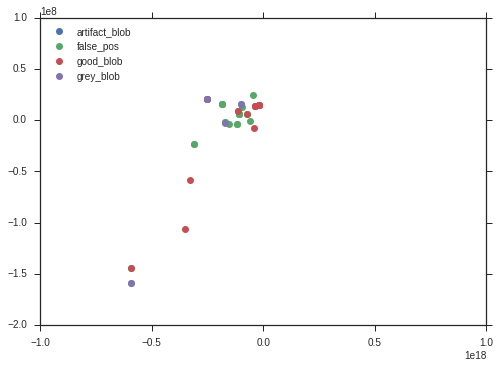

In [221]:
for name in np.unique(labels[0]):
    mask = np.asarray(labels[0]) == name
    plt.plot(x[mask], y[mask], 'o', label=name)
plt.xlim(-1e18, 1e18)
plt.ylim(-2e8, 1e8)
plt.legend(loc='upper left')
plt.show()

In [214]:
np.asarray(labels[0])

array([u'false_pos', u'false_pos', u'grey_blob', u'false_pos',
       u'false_pos', u'false_pos', u'good_blob', u'false_pos',
       u'false_pos', u'good_blob', u'grey_blob', u'artifact_blob',
       u'good_blob', u'false_pos', u'false_pos', u'good_blob',
       u'false_pos', u'false_pos', u'false_pos', u'false_pos',
       u'grey_blob', u'good_blob', u'false_pos', u'false_pos',
       u'false_pos', u'false_pos', u'good_blob', u'false_pos',
       u'grey_blob', u'false_pos', u'false_pos', u'false_pos',
       u'false_pos', u'false_pos', u'false_pos', u'false_pos',
       u'false_pos', u'good_blob', u'false_pos'], dtype=object)

In [ ]:
import os
import img_functions as imf
images = os.listdir('img')
for i in images:
    print('Name: {}'.format(i))
    path = os.path.join(os.getcwd(), 'img', i)
    height, phase = imf.load_scan(path)
    imf.plot_surface(height)

In [244]:
e1, p1 = imf.load_scan('img/e1.txt')
e5, p5 = imf.load_scan('img/e5.txt')
e4, p4 = imf.load_scan('img/e4.txt')

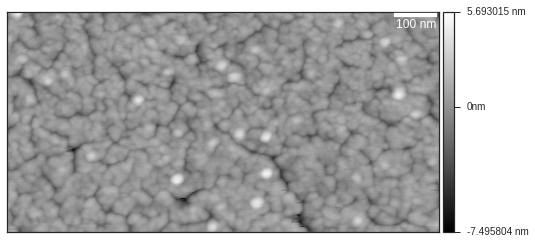

In [242]:
imf.plot_surface(e4)

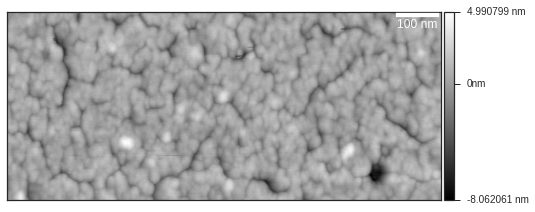

In [245]:
imf.plot_surface(e1)

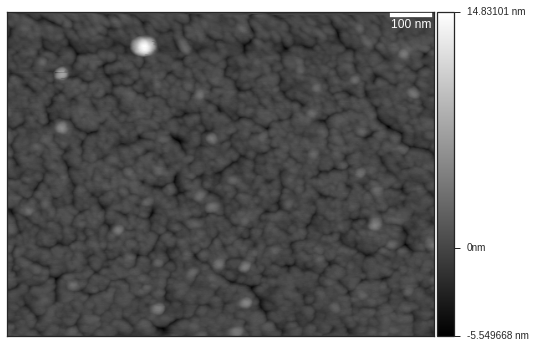

In [246]:
imf.plot_surface(e5)